# Set-up Environment and adding path to git directory

In [0]:
# Print the path
import sys
import os
sys.path.append(os.path.abspath('/Workspace/Repos/janfelix.deman@metyis.com/diffusion'))

print("\n".join(sys.path))
!pip install /Workspace/Repos/janfelix.deman@metyis.com/diffusion/.
!pip install -r /Workspace/Repos/janfelix.deman@metyis.com/diffusion/requirements.txt

/databricks/python_shell/scripts
/local_disk0/spark-78f4af30-58f4-48ed-82f8-094020dd0c45/userFiles-c705b2bc-93b9-4707-ac6c-d5c82f7cc64b
/databricks/spark/python
/databricks/spark/python/lib/py4j-0.10.9.5-src.zip
/databricks/jars/spark--driver--driver-spark_3.3_2.12_deploy.jar
/databricks/python_shell
/usr/lib/python39.zip
/usr/lib/python3.9
/usr/lib/python3.9/lib-dynload

/local_disk0/.ephemeral_nfs/envs/pythonEnv-b3ec3e2f-4f80-4e6c-927e-788aae0b928d/lib/python3.9/site-packages
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages
/databricks/python/lib/python3.9/site-packages
/usr/local/lib/python3.9/dist-packages
/usr/lib/python3/dist-packages
/databricks/python/lib/python3.9/site-packages/IPython/extensions
/root/.ipython
/Workspace/Users/janfelix.deman@metyis.com
/Workspace/Repos/janfelix.deman@metyis.com/diffusion
/Workspace/Repos/janfelix.deman@metyis.com/diffusion
/Workspace/Repos/janfelix.deman@metyis.com/diffusion
Processing /Workspace/Repos/janfelix

# Loading Standard Stable Diffusion Pipeline

In [0]:
# Available models: 
# "runwayml/stable-diffusion-v1-5" : first big open-source
# "dreamlike-art/dreamlike-photoreal-2.0" : community photorealistic
# "stabilityai/stable-diffusion-2"
# "stabilityai/stable-diffusion-2"
# "stabilityai/stable-diffusion-2-1-base"
# "wavymulder/Analog-Diffusion"
# "dreamlike-art/dreamlike-photoreal-2.0"


# For more check out https://huggingface.co/models?pipeline_tag=text-to-image&sort=downloads or https://civitai.com/

model = "runwayml/stable-diffusion-v1-5"

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

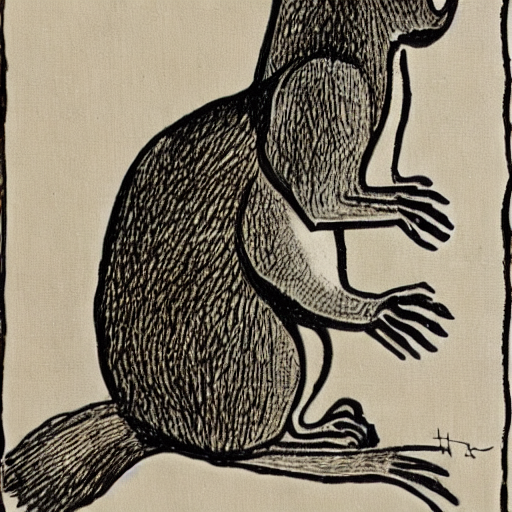

In [0]:

from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch
import numpy as np
from diffusers import DiffusionPipeline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

pipeline = DiffusionPipeline.from_pretrained(model)
pipeline.to(device)
prompt = "An image of a squirrel in Picasso style"
pipeline(prompt).images[0]

## Loading Attend and Excite Pipeline

In [0]:
from utils.ptp_utils import AttentionStore, register_attention_control
from pipeline_attend_and_excite import AttendAndExcitePipeline
from utils.run import run_on_prompt 



attend_pipe = AttendAndExcitePipeline.from_pretrained(model)
indices_to_alter = [5]
controller = AttentionStore()
register_attention_control(attend_pipe, controller)
run_on_prompt(attend_pipe, controller, indices_to_alter)

/databricks/driver


---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
<command-2600445234359414> in <cell line: 3>()
      1 from utils.ptp_utils import AttentionStore, register_attention_control
      2 from pipeline_attend_and_excite import AttendAndExcitePipeline
----> 3 from utils.run import run_on_prompt
      4 
      5 

/databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch(name, globals, locals, fromlist, level)
    169             # Import the desired module. If you’re seeing this while debugging a failed import,
    170             # look at preceding stack frames for relevant error information.
--> 171             original_result = python_builtin_import(name, globals, locals, fromlist, level)
    172 
    173             is_root_import = thread_local._nest_level == 1

/Workspace/Repos/janfelix.deman@metyis.com/diffusion/utils/run.py in <module>
     

In [0]:
%sh vi /local_disk0/.ephemeral_nfs/envs/pythonEnv-90115e60-4e96-49a8-983d-3eb0a0d50f7a/lib/python3.9/site-packages/diffusers/models/cross_attention.py

In [0]:
!

# Training 

## Textual inversion using LoRA:

In [0]:
#export MODEL_NAME="runwayml/stable-diffusion-v1-5"
#export INSTANCE_DIR="/Workspace/Repos/janfelix.deman@metyis.com/diffusion/data/Slim-fit_polo_met_ritskraag_en_perforaties"
#export OUTPUT_DIR="/Workspace/Repos/janfelix.deman@metyis.com/diffusion/output_example_lorpt"

!accelerate launch /Workspace/Repos/janfelix.deman@metyis.com/diffusion/training_scripts/train_lora_w_ti.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"  \
  --instance_data_dir="/Workspace/Repos/janfelix.deman@metyis.com/diffusion/data/Slim-fit_polo_met_ritskraag_en_perforaties" \
  --output_dir="/Workspace/Repos/janfelix.deman@metyis.com/diffusion/output_example_lorpt" \
  --train_text_encoder \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-5 \
  --learning_rate_text=1e-5 \
  --learning_rate_ti=5e-4 \
  --color_jitter \
  --lr_scheduler="constant" \
  --lr_warmup_steps=100 \
  --max_train_steps=5000 \
  --placeholder_token="<hb_polo>" \
  --learnable_property="object"\
  --initializer_token="polo" \
  --save_steps=500 \
  --unfreeze_lora_step=1500 
 

#--stochastic_attribute="game character,3d render,4k,highres" # these attributes will be randomly appended to the prompts
  